In [1]:
from datafiles_and_parsers.yamlscript_corrmatrix import corrmatrix_parser
from plot_classes import *

In [2]:
data = corrmatrix_parser('datafiles_and_parsers/CorrelationMatrix.yaml')

In [3]:
class CMatrixPlot(EmptyPlot):
    
    
    def __init__(self, obj, threshold, **kwargs):        
        
        super().__init__(**kwargs)
        self.hist = obj
        
        # cut original data
        self.hist = self.cut_data(threshold)
        self.list_vals = self.hist.index.to_list()
        
        # set figsize based on data size
        n = len(self.hist)
        self.figsize = (n/3, n/3)
        
        # set default colormap
        self.set_color(colormap='bwr')
        
        # default attributes
        self.setcbar = False
        self.decimal = 1
    
    
    """
    -----------------------------------------------------------------------------------------------------
    Private functions
    -----------------------------------------------------------------------------------------------------
    """    
    
    def cut_data(self, threshold):
        """ Filter correlation data based on numerical threshold """
        """ 
        NOTE: currently, if any data is lower than threshold, entire row/column
              gets cut, need adjustments
        """
        
        data = self.hist
        
        # filter rows
        data = data[abs(data.iloc[0]) >= threshold]
        
        # filter columns based on filtered rows
        data = data.loc[:,[x for x in data.index]]
        
        return data*100

        
    def c_matrix(self, **kwargs):

        # plot the heatmap
        im = self.ax.imshow(self.hist, **kwargs, cmap=mpl.cm.get_cmap(self.user_cmap))
        
        # set color limits to -1, 1 (which is the values correlation can take)
        im.set_clim(-100,100)
        
        if self.setcbar:
            # create new ax for colorbar
            cax = self.fig.add_axes(
                [self.ax.get_position().x1 + 0.01, self.ax.get_position().y0, 0.03, self.ax.get_position().height]
            )
            cbar = self.fig.colorbar(im, cax=cax)

            # change range of colorbar
            cax.set_yticks(np.arange(-100, 101, 25))
            cax.set_yticklabels(np.arange(-100, 101, 25), fontsize=10)
            
            # reduce tick size of colorbar
            cax.tick_params(axis='y', which='both', length=5)

        # set variable names as axis tick labels
        self.ax.set_xticks(np.arange(len(self.list_vals)), labels=self.list_vals, fontsize=self.rcps['font.size'])
        self.ax.set_yticks(np.arange(len(self.list_vals)), labels=self.list_vals, fontsize=self.rcps['font.size'])
        
        # rotate x axis labels
        plt.setp(self.ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
        
        # format entries to one decimal place
        valfmt = mpl.ticker.StrMethodFormatter('{x:.1f}')
        
        # put text in cells
        for i in range(len(self.list_vals)):
            for j in range(len(self.list_vals)):
                self.ax.text(
                    j, 
                    i, 
                    valfmt(self.hist.iloc[i][j], None), 
                    ha='center', # horizontal alignment
                    va='center', # vertical alignment
                    color='k', 
                    size=self.rcps['font.size']
                )
        
        # reset minor ticks
        self.ax.set_xticks(np.arange(len(self.list_vals)+1)-0.5, minor=True)
        self.ax.set_yticks(np.arange(len(self.list_vals)+1)-0.5, minor=True)
        
        # set dotted line internal grid
        self.ax.grid(which='minor', color='k', linestyle='--', linewidth=1)
        
        # remove the axis ticks on every side
        self.ax.tick_params(which='both', bottom=False, left=False, top=False, right=False)
        
        # set master title
        self.fig.suptitle(self.mastertitle, fontsize=self.rcps['axes.titlesize'])
        
        # put atlas logo
        hep.atlas.text(self.logotext, ax=self.ax, loc=0)
    
    
    """
    -----------------------------------------------------------------------------------------------------
    Public functions
    -----------------------------------------------------------------------------------------------------
    """
    
    def figure_options(self, **figkw):
        
        super().figure_options(**figkw)
    
    
    def plot_options(self, setcbar=False, decimal=1, rcp_kw={}):
        
        self.setcbar = setcbar
        self.decimal = decimal
    
    
    def color_options(self, colormap=None, reverse=False):
        
        self.set_color(colormap, reverse)
        
        
    def create(self, save_name='', dpi=1000):
        
        # create plot figure and ax
        self.create_canvas()
        self.make_grid()
        self.ax = self.make_subplot(0, 1, 0, 1)
        
        # make plot
        self.c_matrix()
        
        if save_name:
            self.saveimage(save_name, dpi)

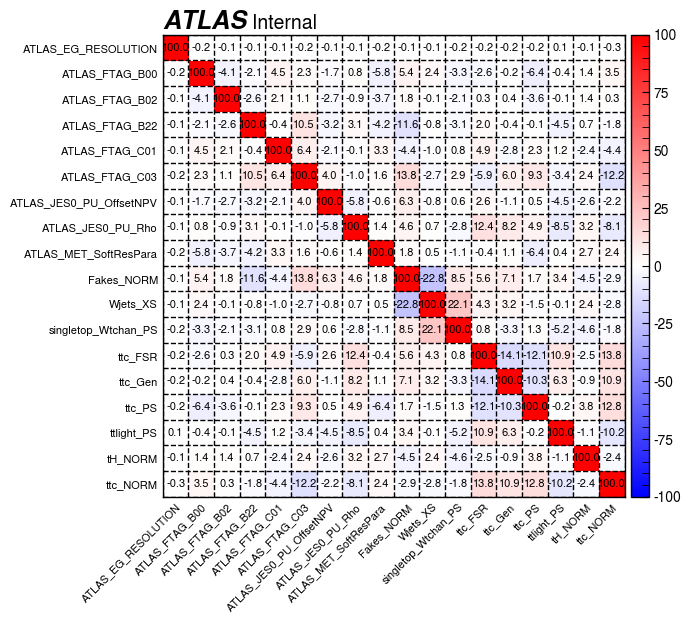

In [17]:
plot = CMatrixPlot(data, 0.0012)
plot.fontsize_options(labels=10, ticks=8)
plot.plot_options(setcbar=True)
plot.figure_options(figsize=(6,6))
plot.create()
# plot.saveimage("CMatrix_demo", 1000)